In [1]:
from collections import Counter 
import numpy as np
import pandas as pd
import csv
from google.colab import drive
drive.mount('/content/gdrive')
directory_path = '/content/gdrive/My Drive/22-1파이썬_팀프로젝트/place_data/csv/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
total = [] #추천 문화생활 장소를 담을 변수 리스트 생성

In [3]:
# 문화생활 장소를 mbti 유형별로 구분하기

E = ['historicalsite', 'camping', 'market', 'trail', 'park', 'sports','climbing']

I = ['handmade', 'museum', 'memorial', 'artmuseum', 'department', 'complexshop', 'arcade', 'bookcafe', 'theater', 'littletheater', 'movietheater', 'bookstore']

S = ['historicalsite', 'handmade', 'museum', 'memorial','camping', 'market', 'department', 'complexshop', 'arcade', 'bookcafe', 'sports','climbing']

N = ['artmuseum', 'camping', 'market', 'department', 'complexshop', 'arcade', 'bookcafe', 'trail', 'park', 'theater', 'littletheater', 'movietheater', 'bookstore']

F = ['historicalsite', 'handmade', 'artmuseum', 'camping', 'bookcafe', 'trail', 'park', 'theater', 'littletheater', 'movietheater', 'bookstore']

T = ['museum', 'memorial', 'market', 'department', 'complexshop', 'arcade', 'sports', 'climbing']

J = ['handmade', 'museum', 'memorial', 'artmuseum', 'camping', 'department', 'complexshop', 'arcade', 'theater', 'littletheater', 'movietheater', 'sports','climbing']

P = ['historicalsite', 'market', 'bookcafe', 'trail', 'park', 'bookstore']

In [4]:
total_MBTI = ['INTJ','INTP','ENTJ','ENTP','INFJ','INFP','ENFJ','ENFP','ISTJ','ISFJ','ESTJ','ESFJ','ISTP','ISFP','ESTP','ESFP'] #16가지의 mbti유형을 담은 리스트

In [5]:
# 사용자로부터 mbti를 입력받는 함수

def inputmbti():
  while 1:
    # 사용자 mbti input 받기
    global total
    total=[]
    mbti = input("당신의 mbti를 입력하세요(소, 대문자 상관없음): ")
    global MBTI 
    MBTI = mbti.upper()
    if MBTI in total_MBTI:
      for i in range(len(MBTI)):
        if MBTI[i] == 'E':
          total.extend(E)
        elif MBTI[i] == 'I':
          total.extend(I) 
        elif MBTI[i] == 'S':
          total.extend(S)
        elif MBTI[i] == 'N':
          total.extend(N)
        elif MBTI[i] == 'T':
          total.extend(T) 
        elif MBTI[i] == 'F':
          total.extend(F)
        elif MBTI[i] == 'J':
          total.extend(J)
        elif MBTI[i] == 'P':
          total.extend(P)
    else:
      print("잘못 입력하셨습니다. 다시 입력하세요")
      continue
    break
  print("당신의 mbti는 %s입니다"%MBTI)
  print(total)
  counter = Counter(total) #카테고리별 알파벳 일치 개수 counter 타입으로 저장
  concordance={**counter} #딕셔너리로 타입 바꾸기
  import operator 
  from operator import itemgetter, attrgetter
  global asc_concordance
  asc_concordance= sorted(concordance.items(), key = operator.itemgetter(1), reverse = False ) #오름차순 정렬
  import numpy as np
  global mbti_dsc
  mbti_dsc=np.array(asc_concordance) #numpy array로 타입 변경
  global name
  name=mbti_dsc[:,0] #카테고리명 추출

In [6]:
# 사용자의 친구로부터 mbti를 입력받는 함수

def inputmbti2():
  while 1:
    # 사용자 mbti input 받기
    global total2
    total2=[]
    mbti2 = input("상대방의 mbti를 입력하세요(소, 대문자 상관없음): ")
    global MBTI2
    MBTI2 = mbti2.upper()
    if (MBTI2 in total_MBTI) :
      for i in range(len(MBTI)):
        if MBTI2[i] == 'E':
          total2.extend(E)
        elif MBTI2[i] == 'I':
          total2.extend(I) 
        elif MBTI2[i] == 'S':
          total2.extend(S)
        elif MBTI2[i] == 'N':
          total2.extend(N)
        elif MBTI2[i] == 'T':
          total2.extend(T) 
        elif MBTI2[i] == 'F':
          total2.extend(F)
        elif MBTI2[i] == 'J':
          total2.extend(J)
        elif MBTI2[i] == 'P':
          total2.extend(P)
    else:
      print("잘못 입력하셨습니다. 다시 입력하세요")
      continue
    break
  print("상대방의 mbti는 %s입니다"%MBTI2)
  print(total2)
  counter2 = Counter(total2)
  concordance2={**counter2} #딕셔너리로 타입 바꾸기
  #레퍼런스: https://stackoverflow.com/questions/11068986/how-to-convert-counter-object-to-dict
  import operator 
  from operator import itemgetter, attrgetter
  #출처: https://sy-log.tistory.com/70 
  global asc_concordance2
  asc_concordance2= sorted(concordance2.items(), key = operator.itemgetter(1), reverse = False )
  import numpy as np
  global two_mbti_dsc
  two_mbti_dsc = np.append(np.array(asc_concordance), np.array(asc_concordance2),axis =0)
  global total_name
  total_name =two_mbti_dsc[:,0]

In [7]:
# 입력받은 두 개의 mbti를 바탕으로 문화생활 장소의 일치율을 그래프로 보여주는 함수

def match_two_mbti():


  global match_two 
  match_two = list(set(total).intersection(total2))
  print(match_two)

In [8]:
#사용자의 mbti와 문화생활 장소의 일치율을 그래프로 보여주는 함수

def matchrate():
  import matplotlib.pyplot as plt
  import seaborn as sns #그라데이션 색상을 위해 seaborn 라이브러리 임포트
  global value
  value=(np.array(mbti_dsc[:,1],dtype=np.float64))/len(MBTI)*100 #일치율 계산
  fig = plt.figure(figsize=(8,8)) ## Figure 생성 
  fig.set_facecolor('white') ## Figure 배경색 지정 
  colors = sns.color_palette('YlGn', len(name)) ## 바 차트 색상
  plt.barh(name, value, color=colors) ## 바차트 출력
  plt.title(MBTI+' mbti match rate', fontsize=20)
  plt.xlabel('match rate') #x라벨 설정
  plt.ylabel('category') #y라벨 설정
  plt.xticks(np.arange(0,125,25),('0%','25%','50%','75%','100%')) ## x축 눈금 라벨 출력
  plt.show()

In [9]:
# 일치율을 바탕으로 사용자가 원하는 문화생활 카테고리를 선택받는 함수

def bestcategory():
  # 추천된 카테고리의 수 카운트
  counter = Counter(total)
  concordance={**counter}
  values = list(concordance.values())
  # 가장 많이 추천된 카테고리의 카운트 횟수
  maxnum = max(values)
  #print(concordance)
  keys = []
  # 카운트가 가장 큰 카테고리를 keys에 append
  print("당신에게 가장 잘 맞는 카테고리:")
  for key, value in concordance.items():
    if value == maxnum:
      keys.append(key)

  #카테고리별 index 부여
  # keys를 df로 변환
  best_category = pd.DataFrame(keys)
  best_category.columns = ['best category']
  best_category.index = range(1, len(keys)+1)
  # 가장 많이 카운트된 카테고리 데이터프레임 사용자에게 보여주기
  print(best_category)
  favorite_num = []
  complete_break = True
  # 사용자가 데이터프레임 중 원하는 카테고리 선택
  while complete_break:
    while 1:
      if favorite_num == []:
        input_num = int(input("마음에 드는 카테고리의 번호를 선택하세요: "))
      elif len(favorite_num) == len(best_category): #모든 카테고리 다 입력시 탈출
          complete_break = False
          break
      else: #카테고리 중복 입력
        input_num = int(input("추가로 확인할 카테고리를 선택하세요 (선택을 중단하길 원할 시 0 입력): "))
      # 마음에 드는 카테고리들 저장 
      if input_num in best_category.index:
        favorite_num.append(input_num) 
      elif input_num == 0:
        complete_break = False
        break
      else: # 바르지 않은 입력 다시 받기
        print("해당 카테고리를 벗어났습니다. 다시 입력하세요.")
        continue
      break

  #print(best_category)
  Best_category = best_category.loc[favorite_num]
  #원하는 문화생활 : best에 지정됨
  global best 
  best= Best_category.values
  print("당신이 원하는 문화생활은 \n",best,"\n입니다.")

In [10]:
# 일치율을 바탕으로 사용자와 사용자의 상대방에게 공통적으로 잘 맞는 문화생활 카테고리를 선택받는 함수

def bestcategory2():
  # 추천된 카테고리의 수 카운트
  counter = Counter(match_two)
  concordance={**counter}
  values = list(concordance.values())
  # 가장 많이 추천된 카테고리의 카운트 횟수
  maxnum = max(values)
  #print(concordance)
  keys = []
  # 카운트가 가장 큰 카테고리를 keys에 append
  print("당신과 상대방에게 가장 잘 맞는 카테고리:")
  for key, value in concordance.items():
    if value == maxnum:
      keys.append(key)

  #카테고리별 index 부여
  # keys를 df로 변환
  best_category = pd.DataFrame(keys).head()
  best_category.columns = ['best category']
  best_category.index = range(1, len(best_category)+1)
  # 가장 많이 카운트된 카테고리 데이터프레임 사용자에게 보여주기
  print(best_category)
  favorite_num = []
  complete_break = True
  # 사용자가 데이터프레임 중 원하는 카테고리 선택
  while complete_break:
    while 1:
      if favorite_num == []:
        input_num = int(input("마음에 드는 카테고리의 번호를 선택하세요: "))
      elif len(favorite_num) == len(best_category): #모든 카테고리 다 입력시 탈출
          complete_break = False
          break
      else: #카테고리 중복 입력
        input_num = int(input("추가로 확인할 카테고리를 선택하세요 (선택을 중단하길 원할 시 0 입력): "))
      # 마음에 드는 카테고리들 저장 
      if input_num in best_category.index:
        favorite_num.append(input_num) 
      elif input_num == 0:
        complete_break = False
        break
      else: # 바르지 않은 입력 다시 받기
        print("해당 카테고리를 벗어났습니다. 다시 입력하세요.")
        continue
      break

  #print(best_category)
  Best_category = best_category.loc[favorite_num]
  #원하는 문화생활 : best에 지정됨
  global best 
  best= Best_category.values
  print("당신이 원하는 문화생활은 \n",best,"\n입니다.")

In [11]:
#folium을 통해 사용자가 원하는 문화생활 카테고리의 지도 위치를 시각화하여 알려주는 함수

def bestmap():
  all_data=[]
  for i in range(len(best)):
    f = open(directory_path + '{}.csv'.format(best[i][0]), 'r', encoding='utf8') 
    data_temp = pd.read_csv(f) # for구문으로 csv파일들을 읽어 들인다
    all_data.append(data_temp) # 빈 리스트에 읽어 들인 내용을 추가한다
  data = pd.concat(all_data, axis=0) #받은 데이터 병합
  data = data.reset_index(drop=True)
  location = pd.DataFrame(data, columns = ['장소명','주소','경도','위도','분류'])
  location = location.astype({'경도':'float'})
  location = location.astype({'위도':'float'})
  import folium
  from folium.plugins import MarkerCluster, MiniMap
  import json           
  import requests 
  #장소필터링 여부 선택
  while 1:
    try: 
      my_location = input("자신의 현주소를 입력해주세요(도로명주소): ")
      #카카오 API 사용하여 주소로부터 위도경도 정보 얻어내기
      def addr_to_lat_lon(addr):
        url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
        headers = {"Authorization": "KakaoAK " + 'fd32761e06a5fcb3126301f3e1e9d69a'}
        result = json.loads(str(requests.get(url, headers=headers).text))
        match_first = result['documents'][0]['address']
        return float(match_first['x']), float(match_first['y'])
      MY_location= addr_to_lat_lon(my_location)
    except:
      print("다시 입력하세요.")
      continue
    break

  global show_location 
  show_location= folium.Map((MY_location[1], MY_location[0]), zoom_start = 13,tiles='cartodbpositron')

  #사용자 현위치
  show_location.add_child(folium.Marker(location = [MY_location[1], MY_location[0]],
                           popup = my_location,
                           icon = folium.Icon(color = 'red', icon = 'user')))
  
  #클러스터
  from folium.plugins import MarkerCluster
  mc = MarkerCluster().add_to(show_location)

  #미니맵
  minimap = MiniMap()
  show_location.add_child(minimap)

  # show_location.add_child(mc)

  # for 문 돌리기 + 장소 분류별 마커 색상 지정
  for i in range(len(location)):
    if location['분류'][i] == 'arcade':
        color = 'purple'
    elif location['분류'][i] == 'artmuseum':
          color = 'darkgreen'
    elif location['분류'][i] == 'bookcafe': 
          color = 'beige'
    elif location['분류'][i] == 'camping': 
          color = 'green'
    elif location['분류'][i] == 'climbing': 
          color = 'blue'
    elif location['분류'][i] == 'complexshop': 
          color = 'pink'
    elif location['분류'][i] == 'department': 
          color = 'pink'
    elif location['분류'][i] == 'historicalsite':
          color = 'lightred'
    elif location['분류'][i] == 'littletheater':
          color = 'orange'
    elif location['분류'][i] == 'market':
          color = 'purple'
    elif location['분류'][i] == 'memorial':
          color = 'lightred'
    elif location['분류'][i] == 'movietheater':
          color = 'orange'
    elif location['분류'][i] == 'museum':
          color = 'darkgreen'
    elif location['분류'][i] == 'park':
          color = 'green'
    elif location['분류'][i] == 'sport':
          color = 'blue'
    elif location['분류'][i] == 'theater':
          color = 'orange'
    elif location['분류'][i] == 'trail':
          color = 'green'
    else:
          color = 'white'  # 미확인

    marker_location = folium.Marker([location.loc[i]['위도'], location.loc[i]['경도']], popup = location.loc[i]['장소명'], icon = folium.Icon(icon='star',color=color))
    marker_location.add_to(mc)
  return show_location
   
  

In [12]:
def backtoinput():
  while 1:
    backtoinput=input("mbti를 다시 입력하시겠습니까?(예=0,아니요=1): ")
    if backtoinput=='0':
      inputmbti()
      matchrate()
      bestcategory()
    elif backtoinput=='1':
      print("기능을 종료합니다.")
      break
    else:
      print("0 또는 1로 다시 입력해주세요")
      continue
    break      


In [13]:
#나와 상대방의 mbti에 맞는 문화생활 장소 추천하는 함수

def intersection_recommend():
  while 1:
    inter_rec = int(input("이 기능은 당신과 당신의 상대방의 mbti를 기반으로 둘 모두에게 맞는 문화생활 카테고리를 상위 5개 추천해주는 기능입니다.(원하시면 0, 원하지 않으시면 아무숫자나 입력해주세요): "))
    if inter_rec == 0:
      inputmbti()
      inputmbti2()
      match_two_mbti()
      bestcategory2()
      break
    else: 
     break

In [14]:
def backtoinput2():
  while 1:
    backtoinput=input("다시 입력하시겠습니까?(예=0,아니요=1): ")
    if backtoinput=='0':
      intersection_recommend()
    elif backtoinput=='1':
      print("기능을 종료합니다.")
      break
    else:
      print("0 또는 1로 다시 입력해주세요")
      continue
    break 

당신의 mbti를 입력하세요(소, 대문자 상관없음): entj
당신의 mbti는 ENTJ입니다
['historicalsite', 'camping', 'market', 'trail', 'park', 'sports', 'climbing', 'artmuseum', 'camping', 'market', 'department', 'complexshop', 'arcade', 'bookcafe', 'trail', 'park', 'theater', 'littletheater', 'movietheater', 'bookstore', 'museum', 'memorial', 'market', 'department', 'complexshop', 'arcade', 'sports', 'climbing', 'handmade', 'museum', 'memorial', 'artmuseum', 'camping', 'department', 'complexshop', 'arcade', 'theater', 'littletheater', 'movietheater', 'sports', 'climbing']


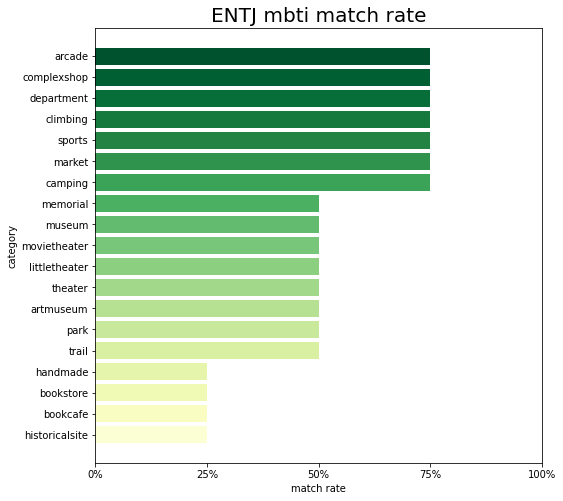

당신에게 가장 잘 맞는 카테고리:
  best category
1       camping
2        market
3        sports
4      climbing
5    department
6   complexshop
7        arcade
마음에 드는 카테고리의 번호를 선택하세요: 1
추가로 확인할 카테고리를 선택하세요 (선택을 중단하길 원할 시 0 입력): 2
추가로 확인할 카테고리를 선택하세요 (선택을 중단하길 원할 시 0 입력): 3
추가로 확인할 카테고리를 선택하세요 (선택을 중단하길 원할 시 0 입력): 0
당신이 원하는 문화생활은 
 [['camping']
 ['market']
 ['sports']] 
입니다.
자신의 현주소를 입력해주세요(도로명주소): 서울시 서대문구 이화여대길 52


In [15]:
#기능 시작

inputmbti()
matchrate()
bestcategory()
bestmap()

In [16]:
backtoinput()

mbti를 다시 입력하시겠습니까?(예=0,아니요=1): 1
기능을 종료합니다.


In [ ]:
bestmap()

In [17]:
intersection_recommend()

이 기능은 당신과 당신의 상대방의 mbti를 기반으로 둘 모두에게 맞는 문화생활 카테고리를 상위 5개 추천해주는 기능입니다.(원하시면 0, 원하지 않으시면 아무숫자나 입력해주세요): 0
당신의 mbti를 입력하세요(소, 대문자 상관없음): entj
당신의 mbti는 ENTJ입니다
['historicalsite', 'camping', 'market', 'trail', 'park', 'sports', 'climbing', 'artmuseum', 'camping', 'market', 'department', 'complexshop', 'arcade', 'bookcafe', 'trail', 'park', 'theater', 'littletheater', 'movietheater', 'bookstore', 'museum', 'memorial', 'market', 'department', 'complexshop', 'arcade', 'sports', 'climbing', 'handmade', 'museum', 'memorial', 'artmuseum', 'camping', 'department', 'complexshop', 'arcade', 'theater', 'littletheater', 'movietheater', 'sports', 'climbing']
상대방의 mbti를 입력하세요(소, 대문자 상관없음): infj
상대방의 mbti는 INFJ입니다
['handmade', 'museum', 'memorial', 'artmuseum', 'department', 'complexshop', 'arcade', 'bookcafe', 'theater', 'littletheater', 'movietheater', 'bookstore', 'artmuseum', 'camping', 'market', 'department', 'complexshop', 'arcade', 'bookcafe', 'trail', 'park', 'theater', 'littletheater', 'movieth

In [18]:
bestmap()

자신의 현주소를 입력해주세요(도로명주소): 서울시 서대문구 이화여대길 52


In [19]:
backtoinput2()

다시 입력하시겠습니까?(예=0,아니요=1): 1
기능을 종료합니다.


In [ ]:
bestmap()